import all the important libraries 

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

Load dataset

In [2]:
data=pd.read_csv('NSL_KDD_full.csv')
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


check unique labels in dataset

In [3]:
data['label']

0          normal
1          normal
2         neptune
3          normal
4          normal
           ...   
148512     normal
148513     normal
148514       back
148515     normal
148516      mscan
Name: label, Length: 148517, dtype: object

check dataset type of each feature 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148517 entries, 0 to 148516
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148517 non-null  int64  
 1   protocol_type                148517 non-null  object 
 2   service                      148517 non-null  object 
 3   flag                         148517 non-null  object 
 4   src_bytes                    148517 non-null  int64  
 5   dst_bytes                    148517 non-null  int64  
 6   land                         148517 non-null  int64  
 7   wrong_fragment               148517 non-null  int64  
 8   urgent                       148517 non-null  int64  
 9   hot                          148517 non-null  int64  
 10  num_failed_logins            148517 non-null  int64  
 11  logged_in                    148517 non-null  int64  
 12  num_compromised              148517 non-null  int64  
 13 

Check if there is any null value

In [5]:
data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

Correlation matrix to check feature imporatance 

<AxesSubplot:>

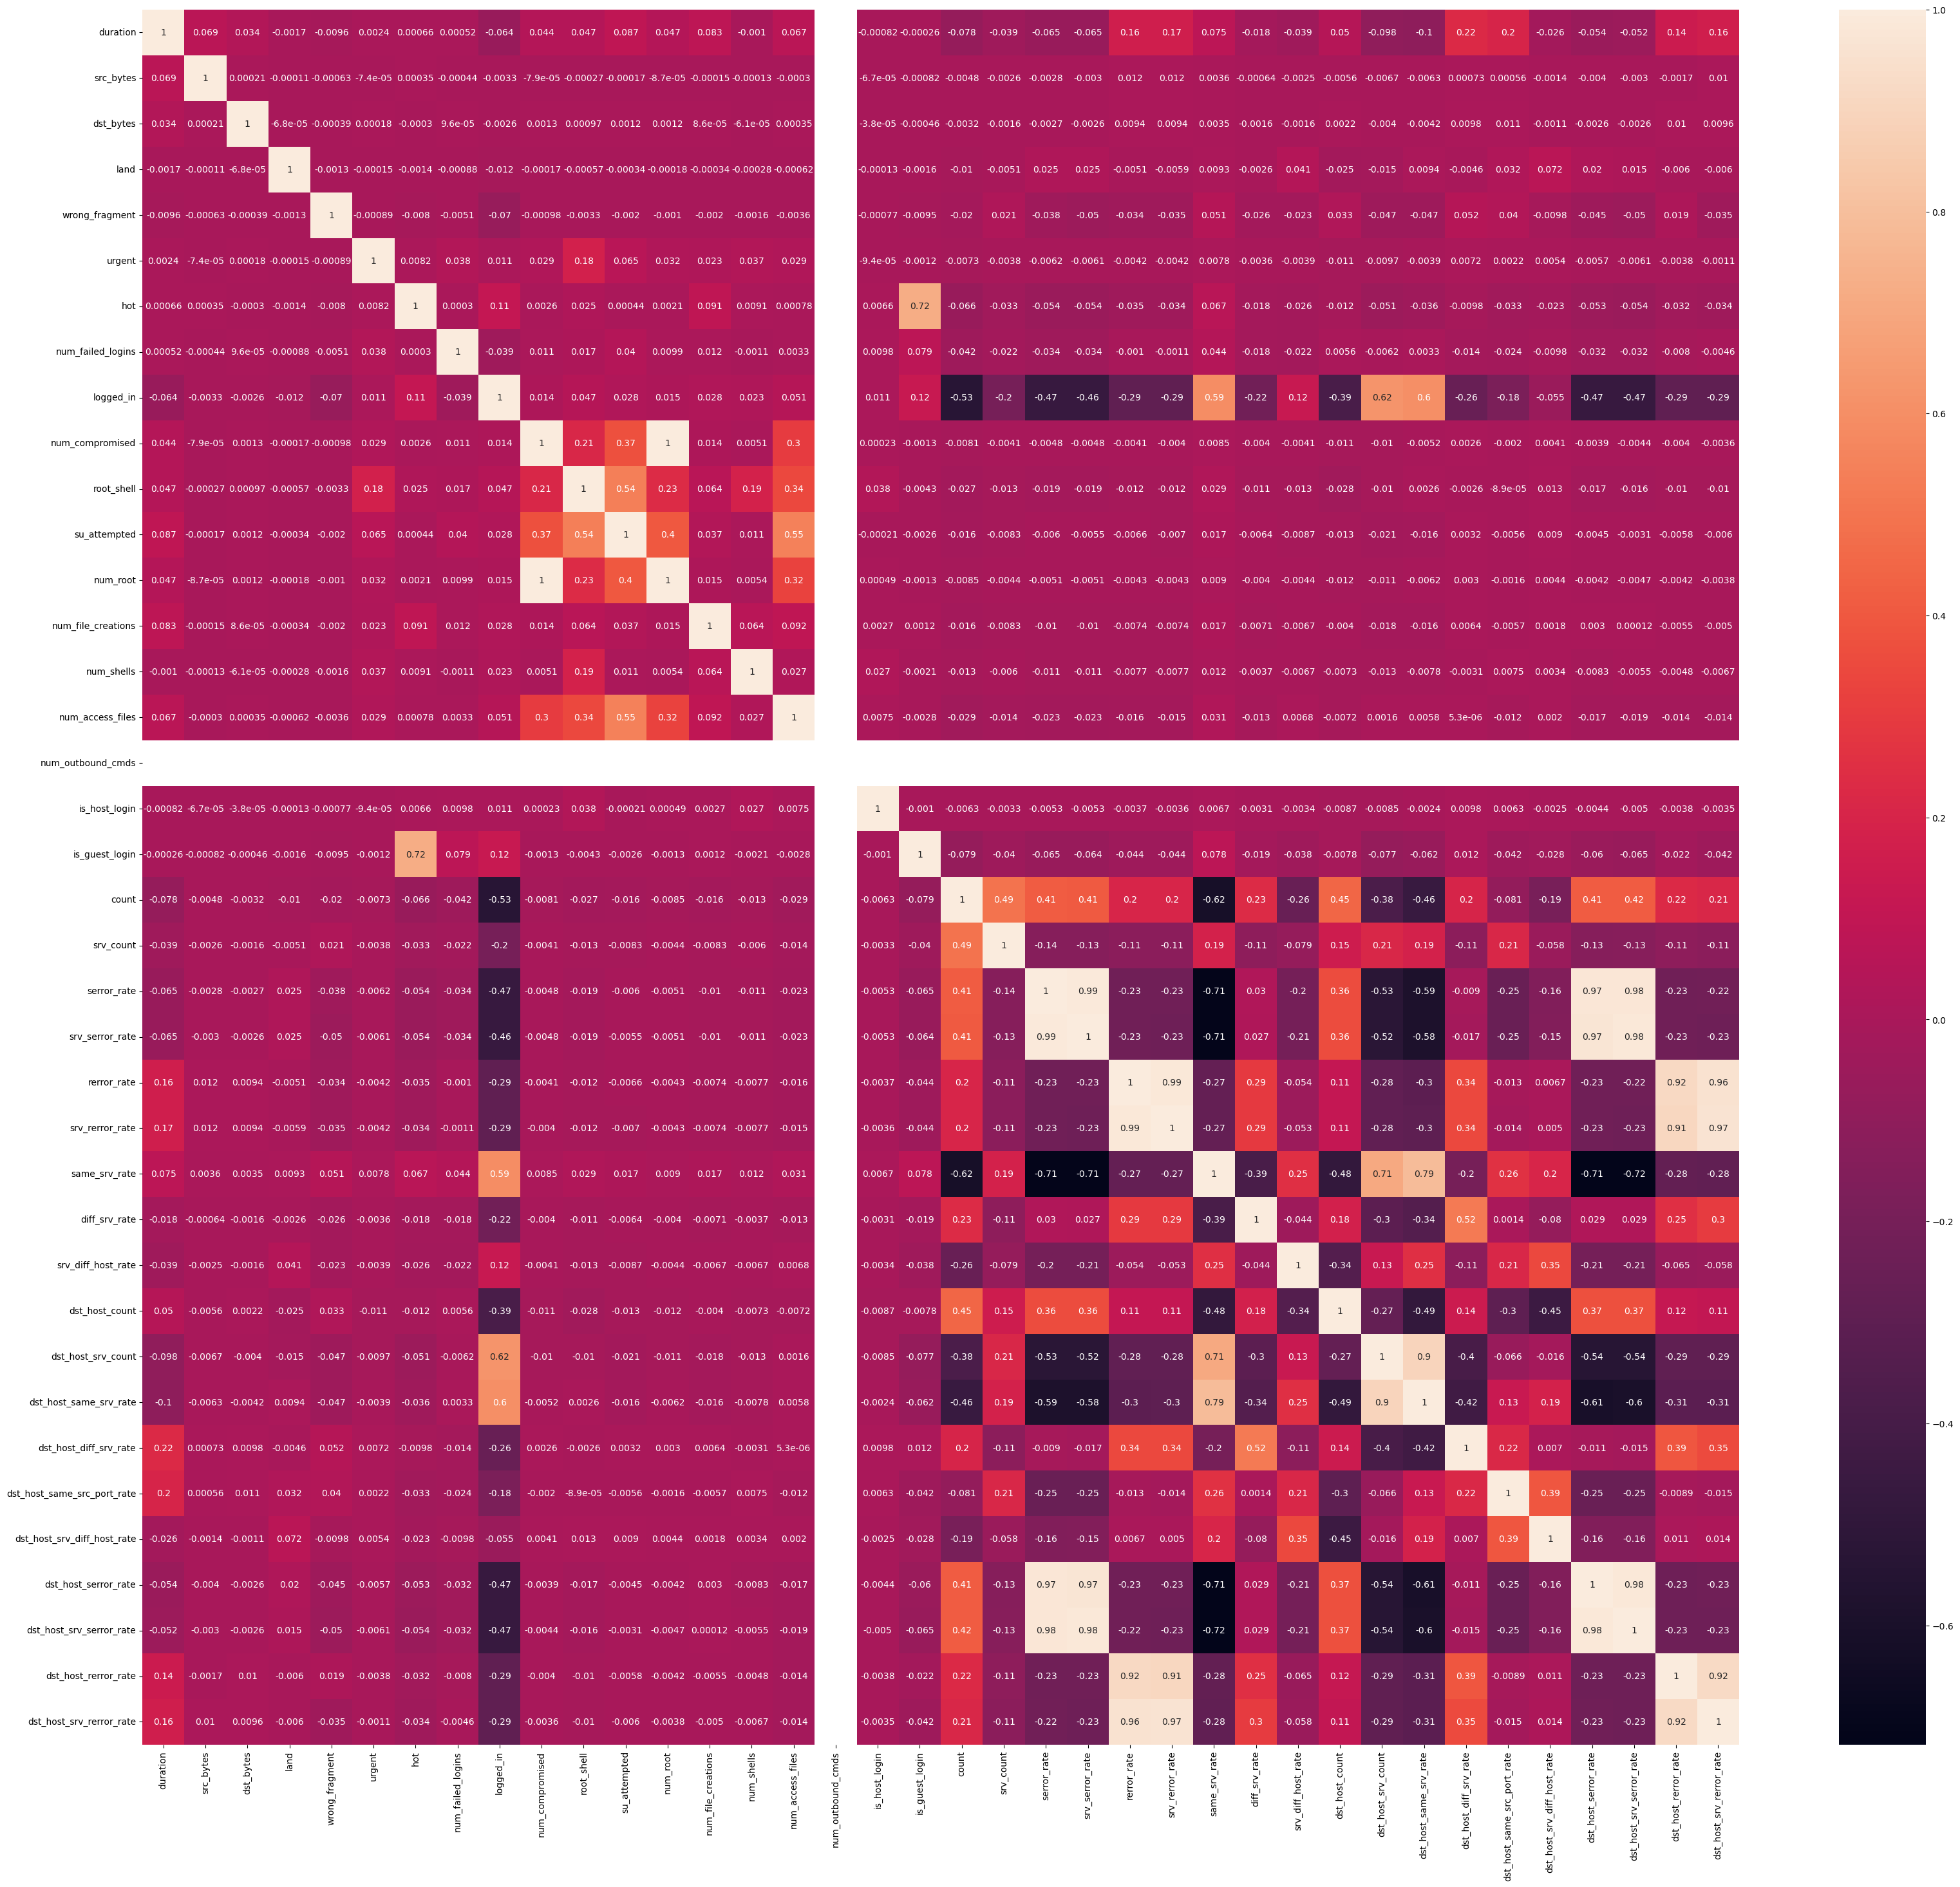

In [6]:
plt.figure(figsize=(40,35))
sns.heatmap(data.corr(), annot= True)

In [7]:
data.drop('num_outbound_cmds',axis=1,inplace=True)

<AxesSubplot:>

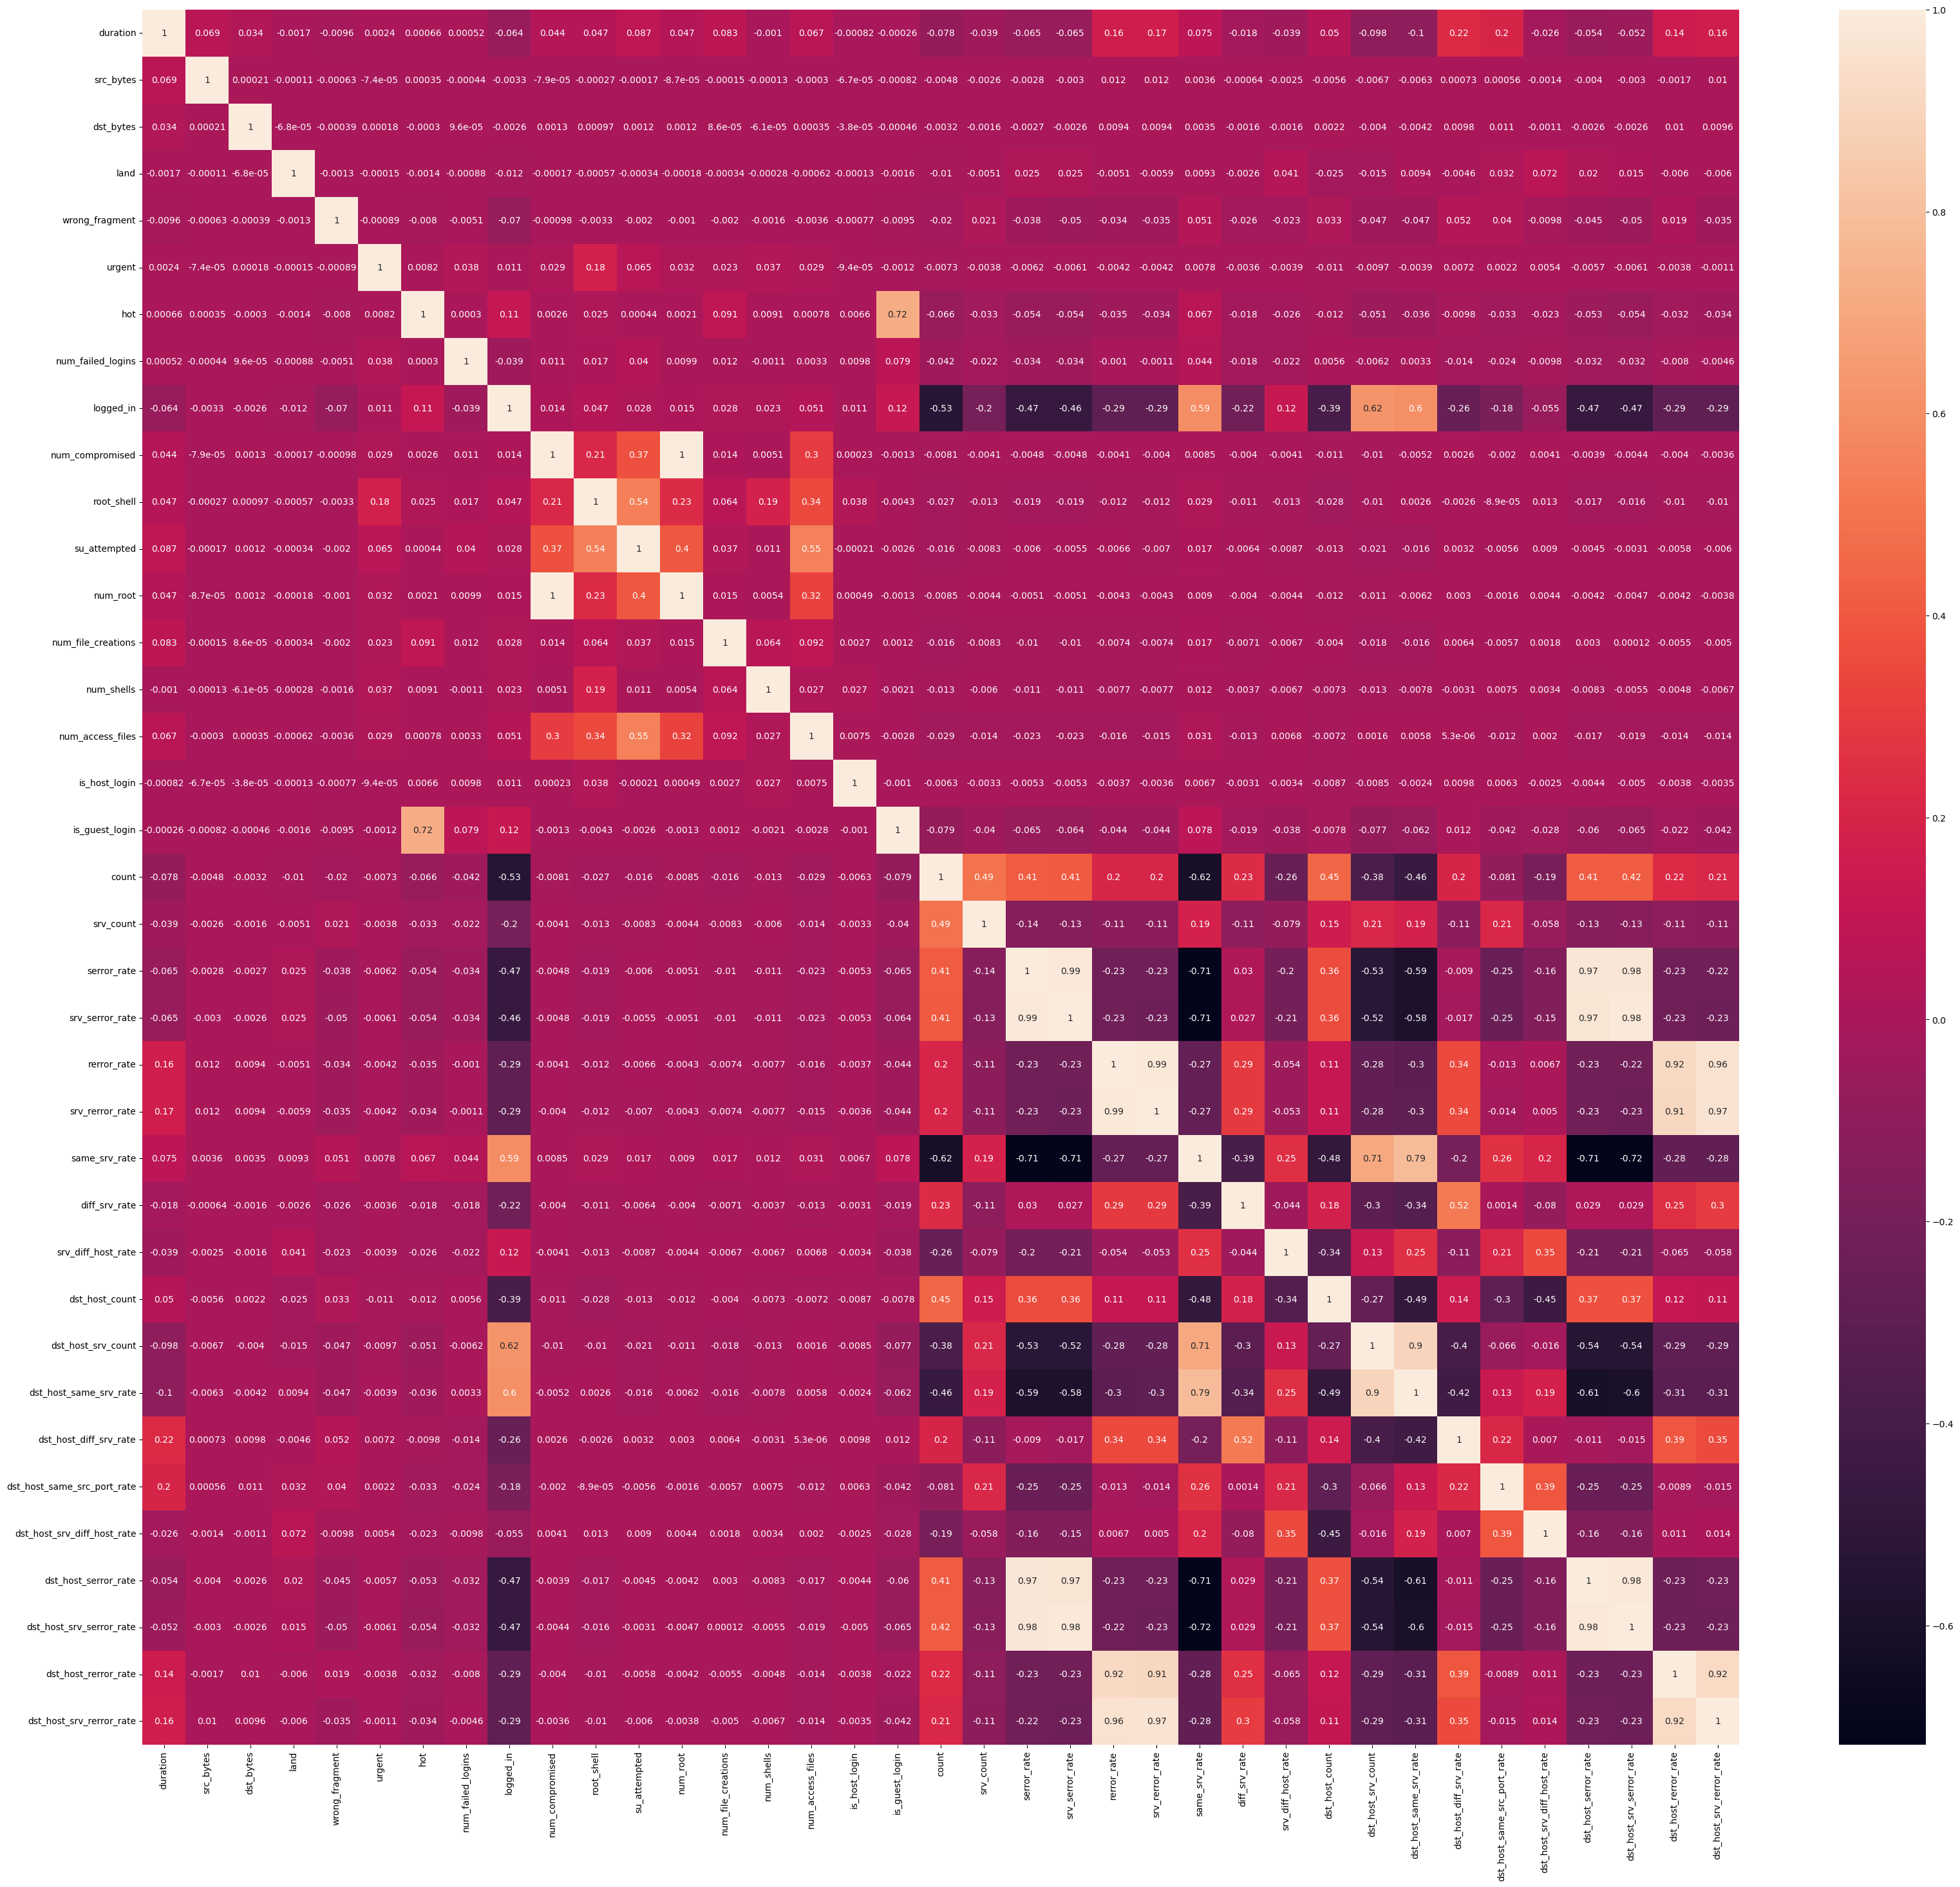

In [8]:
plt.figure(figsize=(40,35))
sns.heatmap(data.corr(), annot= True)

Todal labels for classification 

In [9]:
data.label.unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl', 'saint', 'mscan', 'apache2',
       'snmpgetattack', 'processtable', 'httptunnel', 'ps', 'snmpguess',
       'mailbomb', 'named', 'sendmail', 'xterm', 'worm', 'xlock',
       'xsnoop', 'sqlattack', 'udpstorm'], dtype=object)

Merging some labels to make nice data for classification 

In [10]:
def attack(row):
    if row['label'] == 'normal':
        return 'normal'
    elif row['label'] in ['port-Sweep', 'ip-Sweep', 'nmap', 'satan', 'saint', 'mscan']:
        return 'Probing'
    elif row['label'] in ['neptune', 'smurf', 'pod', 'teardrop', 'land', 'back', 'apache2',
                           'udpstorm', 'processtable', ',mail-Bomb']:
        return 'Dos'
    elif row['label'] in ['buffer-Overflow', 'load-Module', 'perl', 'rootkit', 'xterm',
                           'ps', 'sqlattack']:
        return 'U2R'
    else:
        return 'R2L'

In [11]:
data['label']=data.apply(attack,axis=1)

c:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

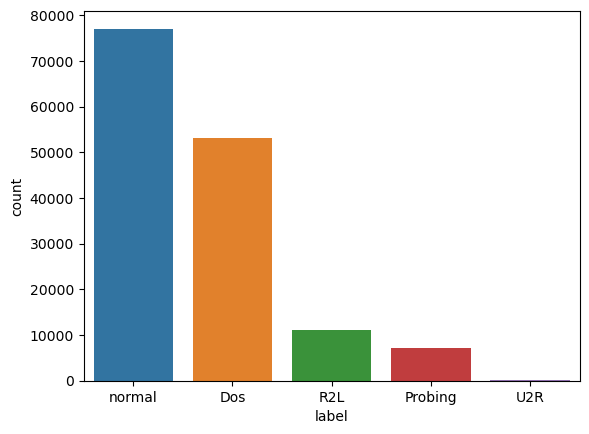

In [12]:
sns.countplot(data['label'])

In [13]:
ob=data.select_dtypes(['object']).columns
ob

Index(['protocol_type', 'service', 'flag', 'label'], dtype='object')

Applying encoding for making the the data categorical for model 

In [14]:
from sklearn.preprocessing import LabelEncoder
protocol_type_le = LabelEncoder()
service_le = LabelEncoder()
flag_le = LabelEncoder()

In [15]:
data['protocol_type'] = protocol_type_le.fit_transform(data['protocol_type'])
data['service'] = service_le.fit_transform(data['service'])
data['flag'] = flag_le.fit_transform(data['flag'])

In [21]:
data = pd.get_dummies(data, columns=['label'])

In [22]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label_Dos,label_Probing,label_R2L,label_U2R,label_normal
0,0,1,20,9,491,0,0,0,0,0,...,0.00,0.00,0.00,0.05,0.00,0,0,0,0,1
1,0,2,44,9,146,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,1
2,0,1,49,5,0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,1,0,0,0,0
3,0,1,24,9,232,8153,0,0,0,0,...,0.04,0.03,0.01,0.00,0.01,0,0,0,0,1
4,0,1,24,9,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,1,54,9,794,333,0,0,0,0,...,0.01,0.01,0.00,0.00,0.00,0,0,0,0,1
148513,0,1,24,9,317,938,0,0,0,0,...,0.01,0.01,0.00,0.00,0.00,0,0,0,0,1
148514,0,1,24,9,54540,8314,0,0,0,2,...,0.00,0.00,0.00,0.07,0.07,1,0,0,0,0
148515,0,2,12,9,42,42,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,1


selecting imporatnat features 

In [23]:
ImportantFeatures=data.columns[0:40]
ImportantFeatures

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'],
      dtype='object')

In [24]:
len(ImportantFeatures)

40

In [25]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label_Dos,label_Probing,label_R2L,label_U2R,label_normal
0,0,1,20,9,491,0,0,0,0,0,...,0.00,0.00,0.00,0.05,0.00,0,0,0,0,1
1,0,2,44,9,146,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,1
2,0,1,49,5,0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,1,0,0,0,0
3,0,1,24,9,232,8153,0,0,0,0,...,0.04,0.03,0.01,0.00,0.01,0,0,0,0,1
4,0,1,24,9,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,1,54,9,794,333,0,0,0,0,...,0.01,0.01,0.00,0.00,0.00,0,0,0,0,1
148513,0,1,24,9,317,938,0,0,0,0,...,0.01,0.01,0.00,0.00,0.00,0,0,0,0,1
148514,0,1,24,9,54540,8314,0,0,0,2,...,0.00,0.00,0.00,0.07,0.07,1,0,0,0,0
148515,0,2,12,9,42,42,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,1


Splitting the labels and features for making data for model 

In [27]:
x= data[ImportantFeatures].values
y= data[['label_normal', 'label_Probing', 'label_Dos', 'label_U2R', 'label_R2L']].values

Split data into train and test

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

Scale data to have good model 

In [30]:
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(X_train)
x_test = ro_scaler.transform(X_test)

In [31]:
ros_scaler = StandardScaler()
x_train = ros_scaler.fit_transform(x_train)
x_test = ros_scaler.transform(x_test)

Making deep learning model for our data

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(units=50, input_dim=x_train.shape[1], activation='relu'))

model.add(Dense(units=5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, batch_size=500, validation_split=0.2)
test_results = model.evaluate(x_test, y_test, verbose=1)
print(test_results[0],test_results[1]*100)

Epoch 1/100
160/160 [==============================] - 1s 3ms/step - loss: 0.5151 - accuracy: 0.8581 - val_loss: 0.2635 - val_accuracy: 0.9208
Epoch 2/100
160/160 [==============================] - 0s 2ms/step - loss: 0.2128 - accuracy: 0.9363 - val_loss: 0.1865 - val_accuracy: 0.9454
Epoch 3/100
160/160 [==============================] - 0s 2ms/step - loss: 0.1590 - accuracy: 0.9513 - val_loss: 0.1455 - val_accuracy: 0.9544
Epoch 4/100
160/160 [==============================] - 0s 2ms/step - loss: 0.1290 - accuracy: 0.9580 - val_loss: 0.1204 - val_accuracy: 0.9604
Epoch 5/100
160/160 [==============================] - 0s 2ms/step - loss: 0.1101 - accuracy: 0.9649 - val_loss: 0.1041 - val_accuracy: 0.9708
Epoch 6/100
160/160 [==============================] - 0s 2ms/step - loss: 0.0976 - accuracy: 0.9716 - val_loss: 0.0940 - val_accuracy: 0.9731
Epoch 7/100
160/160 [==============================] - 0s 2ms/step - loss: 0.0893 - accuracy: 0.9733 - val_loss: 0.0866 - val_accuracy: 0.9772

Plotting the train and val loss and accuracy 

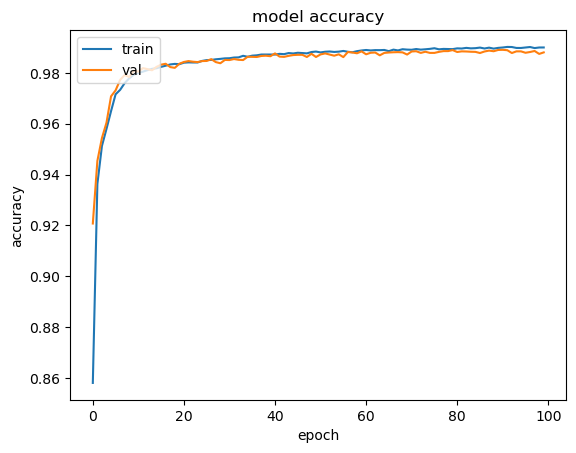

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

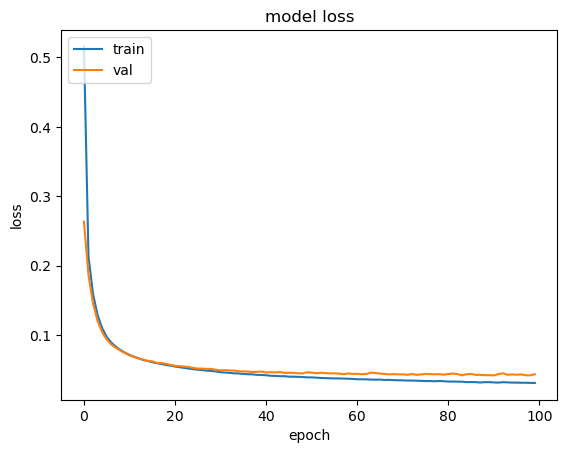

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [36]:
class_names=['label_normal', 'label_Probing', 'label_Dos', 'label_U2R', 'label_R2L']

In [42]:
pred=model.predict(x_test)
pred=np.argmax(pred, axis=1)

1532/1532 [==============================] - 2s 1ms/step


In [43]:
pred

array([0, 0, 0, ..., 4, 0, 0], dtype=int64)

In [45]:
y_test=np.argmax(y_test, axis=1)

In [46]:
cm = confusion_matrix(y_test,pred)

Confusion matrix for our model

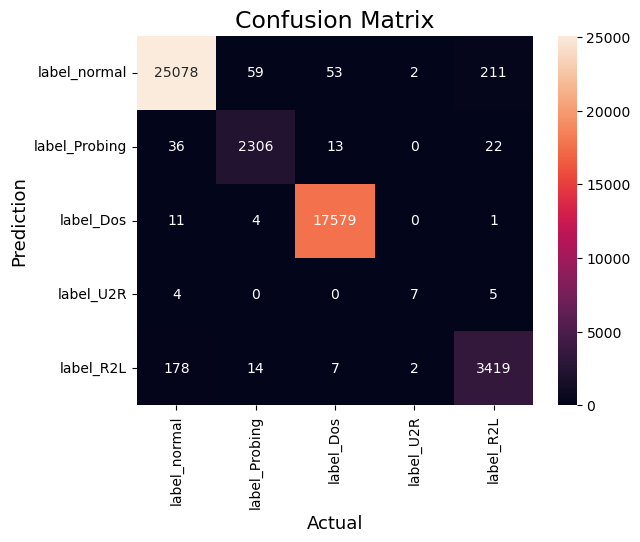

In [47]:


sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=class_names,
            yticklabels=class_names)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

Classificatioon report for our model 

In [49]:
print(classification_report(y_test, pred, target_names=class_names))

               precision    recall  f1-score   support

 label_normal       0.99      0.99      0.99     25403
label_Probing       0.97      0.97      0.97      2377
    label_Dos       1.00      1.00      1.00     17595
    label_U2R       0.64      0.44      0.52        16
    label_R2L       0.93      0.94      0.94      3620

     accuracy                           0.99     49011
    macro avg       0.91      0.87      0.88     49011
 weighted avg       0.99      0.99      0.99     49011

